# <center>Team: MAPLE<center>
## <center>Members: Andy Yang, Gauri Bhandarwar, Vy Nguyen, Weining Mai<center>

# Call API

In [1]:
import requests
import pandas as pd
r = requests.get('https://malegislature.gov/api/Documents', verify=False)
r = r.json()
r

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'malegislature.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


[{'BillNumber': None,
  'DocketNumber': 'HD249',
  'Title': "An Act relative to access to a decedent's electronic mail accounts",
  'PrimarySponsor': {'Id': 'JNR1',
   'Name': 'Jeffrey N. Roy',
   'Type': 1,
   'Details': 'http://malegislature.gov/api/GeneralCourts/193/LegislativeMembers/JNR1',
   'ResponseDate': '2023-01-04T10:19:47.73'},
  'Cosponsors': [{'Id': 'JNR1',
    'Name': 'Jeffrey N. Roy',
    'Type': 1,
    'Details': 'http://malegislature.gov/api/GeneralCourts/193/LegislativeMembers/JNR1',
    'ResponseDate': '2023-01-04T10:19:47.73'}],
  'JointSponsor': None,
  'GeneralCourtNumber': 193,
  'Details': None,
  'IsDocketBookOnly': True},
 {'BillNumber': None,
  'DocketNumber': 'SD2',
  'Title': 'EOE 2022 Student Opportunity Act Report',
  'PrimarySponsor': {'Id': None,
   'Name': 'Executive Office of Education',
   'Type': 4,
   'Details': None,
   'ResponseDate': '2023-01-04T14:32:47.117'},
  'Cosponsors': [],
  'JointSponsor': None,
  'GeneralCourtNumber': 193,
  'Details'

# Data Processing

In [ ]:
# Read data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('all_bills.csv')
df.head()

,Title,BillNumber,DocketNumber,GeneralCourtNumber,PrimarySponsor,Cosponsors,JointSponsor,BillHistory,LegislationTypeName,Pinslip,DocumentText,EmergencyPreamble,RollCalls,Attachments,CommitteeRecommendations,Amendments
0,An Act making appropriations for the Fiscal Ye...,H1,HD1,193.0,"{'Id': 'GOV7', 'Name': 'Maura T. Healey', 'Typ...",[],NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,NaN,NaN,NaN,[],[],[],[]
1,An Act relative to the recovery of overearnings,H10,HD10,193.0,"{'Id': None, 'Name': 'Public Employee Retireme...",[],NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,So much of the recommendations of the Public E...,\tParagraph (c) of Section 91 of chapter 32 of...,NaN,[],[],[],[]
2,An Act relative to buffer zones on land under ...,H100,HD992,193.0,"{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III', ...","[{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III',...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Schmid of Westport, a petiti...",\tSECTION 1. Chapter 20 Section 23 of the Gene...,NaN,[],[],[],[]
3,An Act providing living organ donor protections,H1000,HD941,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 26 of the General Laws is...,NaN,[],[],[],[]
4,An Act relative to step therapy and in vitro f...,H1001,HD952,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",NaN,http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 32A of the General Laws i...,NaN,[],[],[],[]


In [ ]:
df.shape

(6596, 16)

# Get word counts

In [ ]:
def count_words(text):
    if pd.notna(text):
        words = text.split()  # split by spaces
        return len(words)
    else:
        return 0

df['NumWords'] = df['DocumentText'].apply(count_words)

# Summary Statistics

In [ ]:
min = df[df['NumWords'] != 0]['NumWords'].min()
max = df['NumWords'].max()

print(f"The shortest bill contains {min} words")
print(f"The longest bill contains {max} words")

The shortest bill contains 9 words
The longest bill contains 33945 words


In [ ]:
mean = df['NumWords'].mean()
median = df['NumWords'].median()
stdev = df['NumWords'].std()
print(f"The mean number of words in these bills is: {mean}")
print(f"The median number of words in these bills is: {median}")
print(f"The standard deviation of the number of words in these bills is: {stdev}")

The mean number of words in these bills is: 761.0172832019406
The median number of words in these bills is: 287.0
The standard deviation of the number of words in these bills is: 1675.354538243834


Some bills are very concise, while others are quite lengthy, and there may be some bills with an exceptionally high number of words that affect this spread.

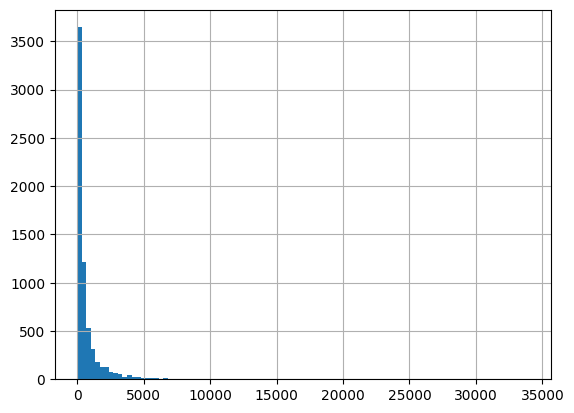

In [ ]:
df['NumWords'].hist(bins=100)
plt.show()

In [ ]:
percent_under_5000 = round(df[df['NumWords'] < 5000].shape[0] / df.shape[0], 2)

print(f"{percent_under_5000 * 100}% of bills are less than 5000 words long, context length shouldn't be a problem")

98.0% of bills are less than 5000 words long, context length shouldn't be a problem


# Type of legislation

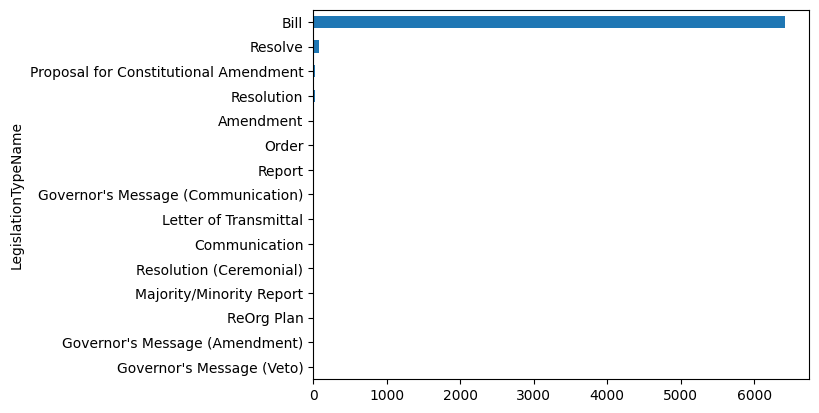

In [ ]:
df['LegislationTypeName'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.show()

By far most of the rows in our dataset are bills, then some are "resolves", "proposals for amendments", "resolutions", etc.

# Primary sponsor analysis

In [ ]:
primary_sponsor_df = pd.read_csv('primary_sponsor.csv')
primary_sponsor_df.head()

,Id,Name,Type,Details,ResponseDate,BillNumber
0,GOV7,Maura T. Healey,1.0,http://malegislature.gov/api/GeneralCourts/193...,2023-03-01T15:21:54.853,H1
1,NaN,Public Employee Retirement Administration Comm...,4.0,NaN,2023-03-06T14:55:05.15,H10
2,PAS1,"Paul A. Schmid, III",1.0,http://malegislature.gov/api/GeneralCourts/193...,2023-01-17T17:49:19.59,H100
3,WJD1,"William J. Driscoll, Jr.",1.0,http://malegislature.gov/api/GeneralCourts/193...,2023-01-17T15:52:55.117,H1000
4,WJD1,"William J. Driscoll, Jr.",1.0,http://malegislature.gov/api/GeneralCourts/193...,2023-01-17T16:23:45.66,H1001


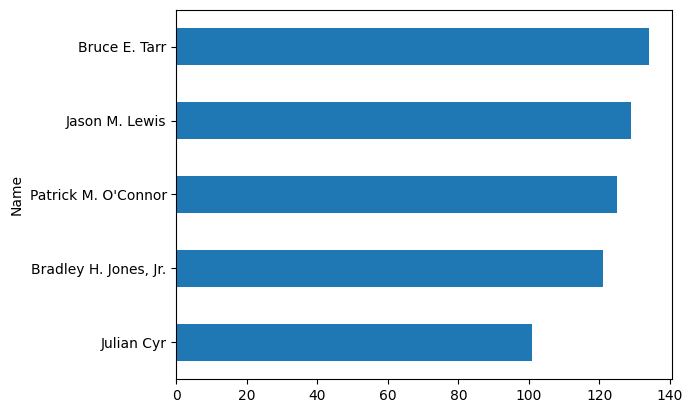

In [ ]:
primary_sponsor_df['Name'].value_counts().sort_values(ascending=True).tail().plot(kind='barh')
plt.show()

<Axes: ylabel='count'>

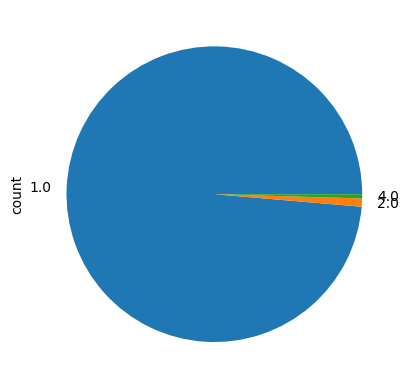

In [ ]:
primary_sponsor_df['Type'].value_counts().plot.pie()

In [ ]:
# Turn string formatted lists into dataframes, BillNumber primary key
import ast
def create_dataframe(column_name):
    df[f'{column_name}_list'] = df[column_name].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != "[]" else [])
    exploded_df = df.explode(f'{column_name}_list')[['BillNumber', f'{column_name}_list']]
    new_df = exploded_df[f'{column_name}_list'].apply(pd.Series)

    new_df['BillNumber'] = exploded_df['BillNumber']

    return new_df


rollcalls_df = create_dataframe('RollCalls')
attachments_df = create_dataframe('Attachments')
committee_recommendations_df = create_dataframe('CommitteeRecommendations')
amendments_df = create_dataframe('Amendments')

In [ ]:
# Check for missing values
print(amendments_df.isna().sum()['AmendmentNumber']/ amendments_df.shape[0])
print(committee_recommendations_df.isna().sum()['Action'] / committee_recommendations_df.shape[0])
print(attachments_df.isna().sum()['Description'] / attachments_df.shape[0])
print(rollcalls_df.isna().sum()['GeneralCourtNumber'] / rollcalls_df.shape[0])

0.769077013521458
0.8645878446658005
0.9830380130243829
0.9917131233991261


These other columns are not as interesting, more than 76% rows are null for each of them.

# Word Frequency Analysis

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

In [ ]:
def preprocess_text(text):
    words = word_tokenize(text.lower())
    # Remove punctuation and non-alphanumeric words
    words = [word for word in words if word not in string.punctuation and word.isalnum()]
    return words

In [ ]:
# Preprocess text
df['words'] = df['DocumentText'].astype(str).apply(preprocess_text)

# Count word frequencies across all documents
all_words = [word for tokens in df['words'] for word in tokens]
word_freq = Counter(all_words)

In [ ]:
# Check the frequency of stop words
stop_words = set(stopwords.words('english'))
stopword_freq = {word: word_freq[word] for word in word_freq.keys() & stop_words}

print(dict(sorted(stopword_freq.items(), key=lambda item: item[1], reverse=True)))

{'the': 383924, 'of': 241397, 'and': 143664, 'to': 130293, 'or': 123273, 'a': 122537, 'in': 94613, 'by': 66045, 'for': 58710, 'be': 49446, 'is': 42994, 'as': 42367, 'that': 38545, 'any': 36605, 'this': 30192, 'with': 30070, 'not': 29085, 'an': 28782, 'on': 23421, 'such': 23078, 'under': 18374, 'other': 16786, 'from': 15848, 's': 13546, 'which': 12698, 'at': 12685, 'after': 12171, 'if': 11839, 'all': 11328, 'than': 10904, 'who': 9890, 'each': 9119, 'are': 8803, 'its': 8547, 'have': 8472, 'out': 8452, 'has': 8403, 'so': 8099, 'but': 7491, 'i': 7014, 'no': 6390, 'further': 6377, 'more': 5818, 'their': 5533, 'it': 4836, 'd': 4513, 'been': 4159, 'through': 3698, 'into': 2956, 'will': 2895, 'before': 2887, 'was': 2875, 'whom': 2785, 'during': 2642, 'there': 2629, 'same': 2589, 'where': 2504, 'when': 2461, 'only': 2146, 'those': 2128, 'his': 2068, 'against': 2001, 'does': 1946, 'between': 1873, 'they': 1701, 'until': 1519, 'can': 1416, 'over': 1395, 'these': 1360, 'both': 1321, 'being': 1278,

In [ ]:
# Remove stopwords from tokens
df['no_stopwords'] = df['words'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Count word frequencies without stopwords
all_words = [word for tokens in df['no_stopwords'] for word in tokens]
word_freq = Counter(all_words)

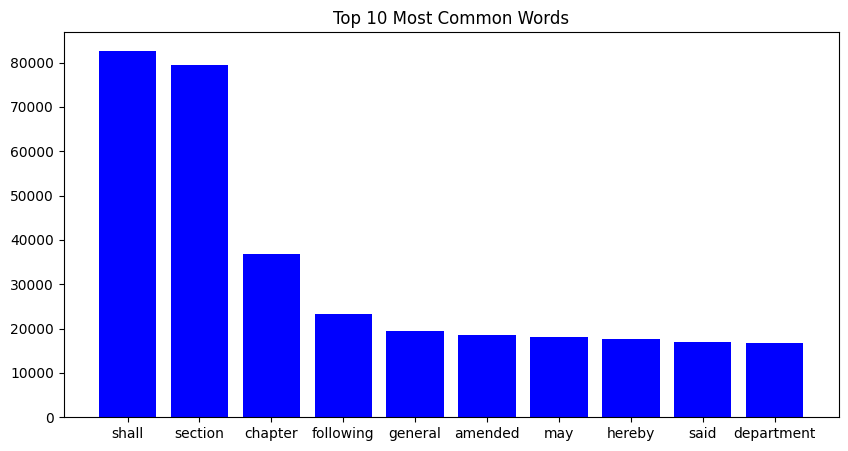

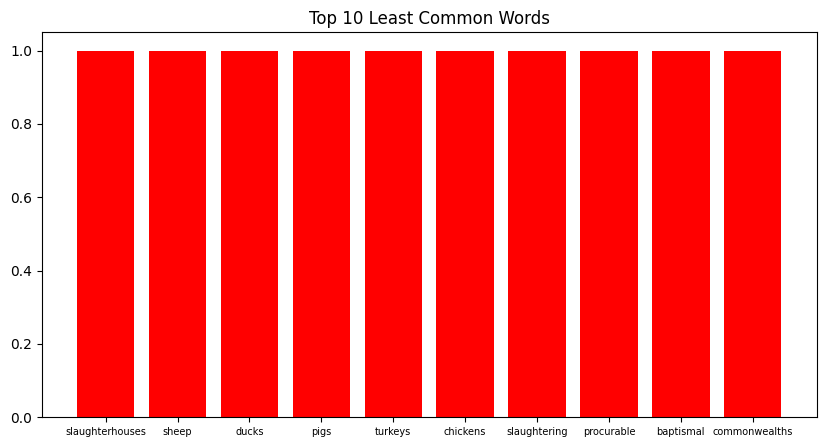

In [ ]:
# Display Top 10 most frequent words
top_words = word_freq.most_common(10)

# Plot
plt.figure(figsize=(10,5))
words, counts = zip(*top_words)
plt.bar(words, counts, color='blue')
plt.title('Top 10 Most Common Words')
plt.show()

# Display Top 20 least frequent words
bottom_words = word_freq.most_common()[:-11:-1]

# Plot
plt.figure(figsize=(10,5))
words, counts = zip(*bottom_words)
plt.bar(words, counts, color='red')
plt.title('Top 10 Least Common Words')
plt.xticks(fontsize=7)
plt.show()


## Word Cloud

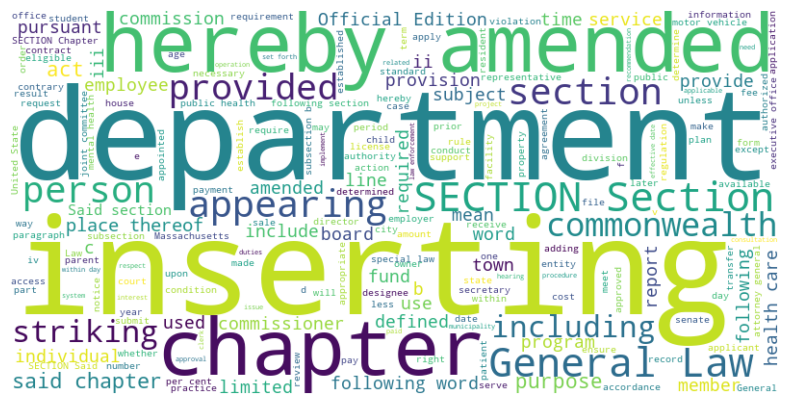

In [ ]:
# DocumentText
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


all_texts = ' '.join(text for text in df['DocumentText'].dropna())
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(all_texts)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()